In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#!pip install pandas
%pwd

'C:\\Users\\rb\\OneDrive - Balaian\\School\\Capstone'

In [2]:
############################
#####  SET THESE VARS  #####
############################
BodyPartPath = r'C:\Users\rb\OneDrive - Balaian\School\Capstone\Collapsed'
BrokenPath   = r'C:\Users\rb\OneDrive - Balaian\School\Capstone\BrokenNotbroken'
target_size  = (128, 128)
input_shape  = (128, 128, 3)
batch_size   = 32
epoch_count  = 10

print('thank you for setting vars')

thank you for setting vars


In [3]:
import tensorflow as tf
from tensorflow import keras
print('Tensorflow version: ', tf.__version__)
print('Keras version     : ', keras.__version__)

# GPU SETUP (YOU MAY NEED TO SKIP THIS) 
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.list_physical_devices()

# FOR DEBUG of GPU USE
tf.debugging.set_log_device_placement(False)


Tensorflow version:  2.5.0-dev20201123
Keras version     :  2.5.0
Num GPUs Available:  1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']), label='Train Accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']), label = 'Val Accuracy')
  plt.legend()
  plt.ylim([0, 1])

In [5]:
def train_bodypart():

    train_path = BodyPartPath + '\\train'
    valid_path = BodyPartPath + '\\valid'

    train_datagen = ImageDataGenerator(
        rescale = 1.0 / 255.0) #,     
        #rotation_range = 90, # rotation
        #horizontal_flip = True) # horizontal flip
        
    valid_datagen = ImageDataGenerator(
        rescale = 1.0 / 255.0)
        
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size = target_size,
        batch_size = batch_size,
        class_mode = "categorical",
        seed = 123)

    valid_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size = target_size,
        batch_size = batch_size,
        class_mode = "categorical",
        seed = 123)

    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape = input_shape))
    model.add(BatchNormalization())    
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3), input_shape = input_shape))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())    
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (3, 3), input_shape = input_shape))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())    
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (3, 3), input_shape = input_shape))
    model.add(BatchNormalization())    
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (3, 3), input_shape = input_shape))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())    
    model.add(Activation('relu'))
   
    model.add(Flatten()) 
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    model.summary()
        
    history = model.fit(train_generator, epochs = epoch_count, validation_data = valid_generator)
    
    plot_history(history)

In [6]:
def train_broken():
    train_path = BrokenPath + '\\train'
    valid_path = BrokenPath + '\\valid'

    train_datagen = ImageDataGenerator(
        rescale = 1.0 / 255.0) #,     
        #rotation_range = 90, # rotation
        #horizontal_flip = True) # horizontal flip

    valid_datagen = ImageDataGenerator(
        rescale = 1.0 / 255.0)
        
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size = target_size,
        batch_size = batch_size,
        class_mode = "binary",
        seed = 123)

    valid_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size = target_size,
        batch_size = batch_size,
        class_mode = "binary",
        seed = 123)

    model = Sequential()
    
    model.add(Conv2D(32, (5, 5), input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3)))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(96, (3, 3)))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(160, (3, 3)))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(192,(3, 3)))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(256, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
        
    model.add(Flatten())
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Dense(1))              
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    model.summary()
    
    history = model.fit(train_generator, epochs = 30, validation_data = valid_generator)
    
    plot_history(history)
    

Found 36806 images belonging to 7 classes.
Found 3197 images belonging to 7 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        256       
_____________________________________

Epoch 1/30
1151/1151 [==============================] - 85s 72ms/step - loss: 0.6702 - accuracy: 0.6013 - val_loss: 0.6883 - val_accuracy: 0.5687
Epoch 2/30
1151/1151 [==============================] - 82s 71ms/step - loss: 0.6125 - accuracy: 0.6695 - val_loss: 0.6924 - val_accuracy: 0.5777
Epoch 3/30
1151/1151 [==============================] - 82s 71ms/step - loss: 0.5828 - accuracy: 0.6972 - val_loss: 0.6990 - val_accuracy: 0.6124
Epoch 4/30
1151/1151 [==============================] - 83s 72ms/step - loss: 0.5578 - accuracy: 0.7188 - val_loss: 0.6424 - val_accuracy: 0.6494
Epoch 5/30
1151/1151 [==============================] - 81s 71ms/step - loss: 0.5411 - accuracy: 0.7292 - val_loss: 0.6898 - val_accuracy: 0.6137
Epoch 6/30
1151/1151 [==============================] - 82s 71ms/step - loss: 0.5157 - accuracy: 0.7461 - val_loss: 0.6899 - val_accuracy: 0.6290
Epoch 7/30
1151/1151 [==============================] - 83s 72ms/step - loss: 0.4900 - accuracy: 0.7667 - val_loss: 0.6208 -

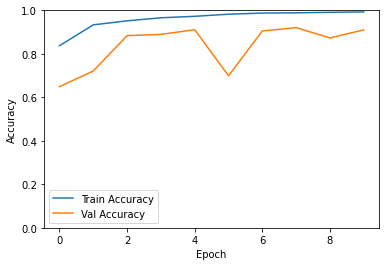

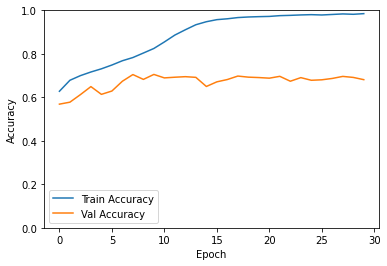

In [7]:
train_bodypart()

train_broken()
